In [1]:
%pylab inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14.0

Populating the interactive namespace from numpy and matplotlib


The model reads as follows:

$$ \dot y_i = r_i y_i \left(1 - \sum_{j=1}^N A_{ij} y_j \right)$$

In [2]:
import math_biol as mb

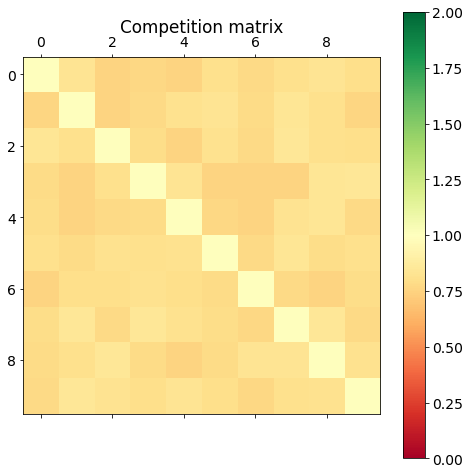

In [3]:
dims = 10
A = mb.competition_matrix(dims, -0.2, 'sliding_window')

plt.matshow(A, cmap=cm.RdYlGn, vmin=0, vmax=2)
plt.colorbar();
plt.title('Competition matrix');

In [4]:
settings = {
    'r':1.0,
    'K':1.0,
    'A':A
}

def my_competition(y, t):
    return mb.competition(y, t, **settings)

In [5]:
from scipy.integrate import odeint

t0 = 0
t1 = 150
tSteps = 10**4
ts = linspace(t0, t1, tSteps)

y0 = 0.5 * np.random.rand(dims)

ys = odeint(my_competition, y0, ts)

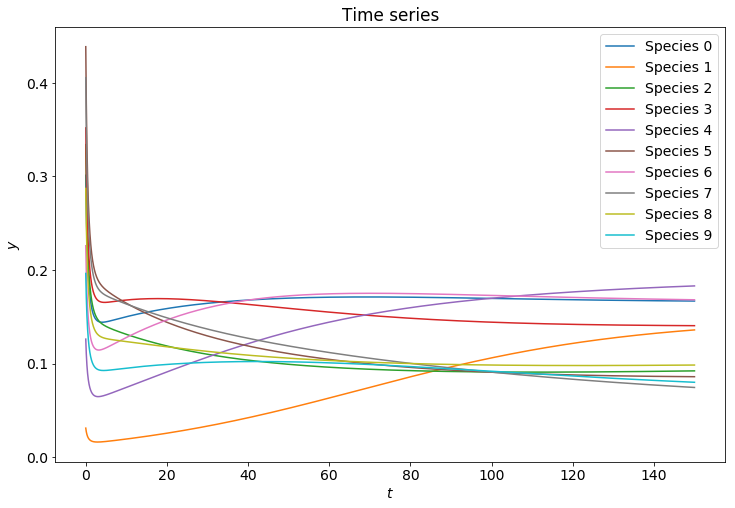

In [6]:
plt.plot(ts, ys)
#plt.plot(ts, np.sum(ys, axis=1), '--')
plt.title('Time series')
plt.xlabel('$t$')
plt.ylabel('$y$');

# Generate legend
legends = []
for i in range(0, dims):
    legends.append('Species %d' % i)
    
plt.legend(legends);
